Get the implicit utility function.

In [1]:
struct Calibration
    σ::Float64           #elasticity of relative demand with respect to price         
    γ::Vector{Float64}   #intensity in each good
    ϵ::Vector{Float64}   #elasticity of relative demand with respect to income in luxury good sector
    κ::Vector{Float64}   #For Stone and Geary
    p::Vector{Float64}
end


In [5]:
cal = Calibration(
    0.5,                    # sigma=0.5 completementary goods
    [1/3, 1/3, 1/3],        #intensity
    [0.7, 1.0, 1.25],       #ELASTICITIES
    [0.05, 0.03, 0.02],     #For Stone and Geary
    [10.0, 20.0, 30.0]
)

Calibration(0.5, [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.7, 1.0, 1.25], [0.05, 0.03, 0.02], [10.0, 20.0, 30.0])

In [6]:
ρ=((cal.σ-1)/cal.σ)

-1.0

In [4]:
#Function CES
function CES(C::Vector{Int64}, cal)
    U=sum(cal.γ[i]*C[i]^ρ for i=1:length(C))^(1/ρ)
    return U
end

CES (generic function with 1 method)

In [5]:
u=[]
C_1=[]
C_2=[]
C_3=[]

scale=3
for i = 1:scale
    for j=1:scale
        for k =1:scale
            res = CES([i,j,k],cal)
            u=push!(u,res)
            C_1=push!(C_1,i)
            C_2=push!(C_2,j)
            C_3=push!(C_3,k)
        end
    end
end
[u C_1 C_2 C_3]

27×4 Matrix{Real}:
 1.0      1  1  1
 1.2      1  1  2
 1.28571  1  1  3
 1.2      1  2  1
 1.5      1  2  2
 1.63636  1  2  3
 1.28571  1  3  1
 1.63636  1  3  2
 1.8      1  3  3
 1.2      2  1  1
 ⋮              
 1.28571  3  1  1
 1.63636  3  1  2
 1.8      3  1  3
 1.63636  3  2  1
 2.25     3  2  2
 2.57143  3  2  3
 1.8      3  3  1
 2.57143  3  3  2
 3.0      3  3  3

In [6]:
#Function Stone and Geary
function SG(C::Vector{Int64}, cal)
    U=sum(cal.γ[i]*(C[i]+cal.κ[i])^ρ for i=1:length(C))^(1/ρ)
    return U
end

SG (generic function with 1 method)

In [7]:
u=[]
C_1=[]
C_2=[]
C_3=[]

scale=3
for i = 1:scale
    for j=1:scale
        for k =1:scale
            res = SG([i,j,k],cal)
            u=push!(u,res)
            C_1=push!(C_1,i)
            C_2=push!(C_2,j)
            C_3=push!(C_3,k)
        end
    end
end
[u C_1 C_2 C_3]

27×4 Matrix{Real}:
 1.03318  1  1  1
 1.24054  1  1  2
 1.33074  1  1  3
 1.23692  1  2  1
 1.54636  1  2  2
 1.68908  1  2  3
 1.32579  1  3  1
 1.6878   1  3  2
 1.85927  1  3  3
 1.22998  2  1  1
 ⋮              
 1.31629  3  1  1
 1.67243  3  1  2
 1.84064  3  1  3
 1.66586  3  2  1
 2.28045  3  2  2
 2.60506  3  2  3
 1.83117  3  3  1
 2.60202  3  3  2
 3.03328  3  3  3

In [25]:
using NLsolve

function solvingNH(u, C::Vector{Int64}, cal)
    out=sum(cal.γ[i]^(1/cal.σ)*(C[i]/u^cal.ϵ[i])^ρ for i=1:length(C))-1
    return out
end

function NHUtility(u,C::Vector{Int64},cal)
    u=1.0
    res = nlsolve(u->[solvingNH(u[1], C, cal)], [1.0])
    U=res.zero[1]
    return U
end

NHUtility (generic function with 1 method)

8.786777521566817

In [ ]:
function solvingC_p(u,C::Vector{Int64},cal)
    Expenditure=sum(NHUtility(u,C,cal)^cal.ϵ[i]*cal.p[i]^(1-cal.σ) for i = 1:length(C))
    P=NHUtility[u,[c_p, c_n, c_l],cal]^cal.ϵ[1] * (cal.p[1]/NH_Exp)^(-cal.σ)-c_p
    N=NHUtility[u,[c_p, c_n, c_l],cal]^cal.ϵ[2] * (cal.p[2]/NH_Exp)^(-cal.σ)-c_n
    L=NHUtility[u,[c_p, c_n, c_l],cal]^cal.ϵ[3] * (cal.p[3]/NH_Exp)^(-cal.σ)-c_l
    return out
end


In [23]:
C=[c_p,c_l,c_l]
NH_Exp=sum(NHUtility(u,C,cal)^cal.ϵ[i]*cal.p[i]^(1-cal.σ) for i = 1:length(C))

c_p=NHUtility[u,[c_p,c_n,c_l],cal]^cal.ϵ[1] * (cal.p[1]/NH_Exp)^(-cal.σ)
c_n=NHUtility[u,[c_p,c_n,c_l],cal]^cal.ϵ[2] * (cal.p[2]/NH_Exp)^(-cal.σ)
c_l=NHUtility[u,[c_p,c_n,c_l],cal]^cal.ϵ[3] * (cal.p[3]/NH_Exp)^(-cal.σ)

513.9359860367287

In [ ]:
c_p=NHUtility[u,[c_p,c_n,c_l],cal]^cal.ϵ[1] * (p[t,1]/NH_Exp[t,i])^(-cal.σ)
c_p=NHUtility[u,[c_p,c_n,c_l],cal]^cal.ϵ[2] * (p[t,2]/NH_Exp[t,i])^(-cal.σ)
c_p=NHUtility[u,[c_p,c_n,c_l],cal]^cal.ϵ[3] * (p[t,3]/NH_Exp[t,i])^(-cal.σ)


In [47]:
u=[]
C_1=[]
C_2=[]
C_3=[]

scale=10
for i = 1:scale
    for j=1:scale
        for k =1:scale
            res = nlsolve(u->[solvingNH(u[1], [i, j, k], cal)], [1.0])
            U=res.zero[1]
            u=push!(u,U)
            C_1=push!(C_1,i)
            C_2=push!(C_2,j)
            C_3=push!(C_3,k)
        end
    end
end
[u C_1 C_2 C_3]

1000×4 Matrix{Real}:
  2.96635   1   1   1
  3.80055   1   1   2
  4.23173   1   1   3
  4.49771   1   1   4
  4.67874   1   1   5
  4.81009   1   1   6
  4.90981   1   1   7
  4.98814   1   1   8
  5.05129   1   1   9
  5.10331   1   1  10
  ⋮                
  8.86869  10  10   2
 11.7638   10  10   3
 14.2651   10  10   4
 16.4802   10  10   5
 18.4723   10  10   6
 20.2836   10  10   7
 21.9439   10  10   8
 23.4758   10  10   9
 24.8966   10  10  10

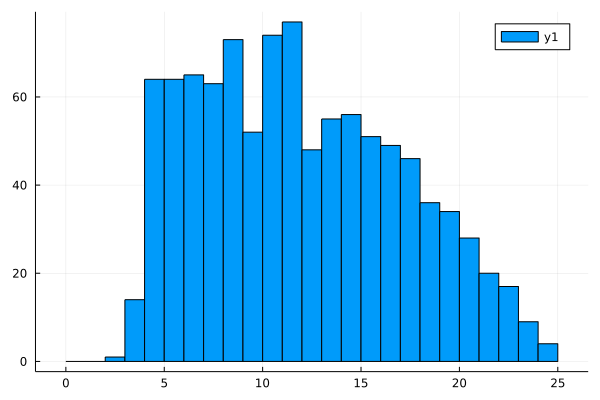

In [43]:
using Plots, Distributions
plot(u)
histogram(u; bins = 0:1:25)


In [ ]:
c_p=u[i]^cal.ϵ_p * (p[t,1]/NH_Exp[t,i])^(-cal.σ)
c_n=u[i]^cal.ϵ_n * (p[t,2]/NH_Exp[t,i])^(-cal.σ)
c_l=u[i]^cal.ϵ_l * (p[t,3]/NH_Exp[t,i])^(-cal.σ)